## We will see K-Means and Hierarchical Clustering algorithms.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#we drop Id column because it's not a useful feature for us.
data.drop(["Id"],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Some Exploratory Data Analysis With Iris

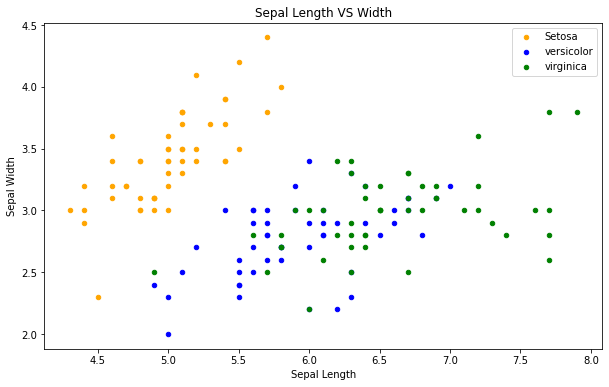

In [6]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal
length and width.

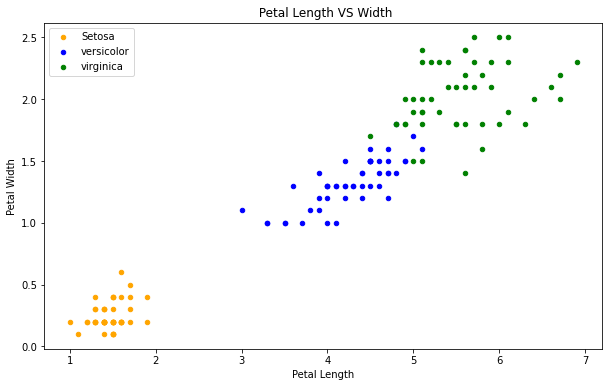

In [7]:
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

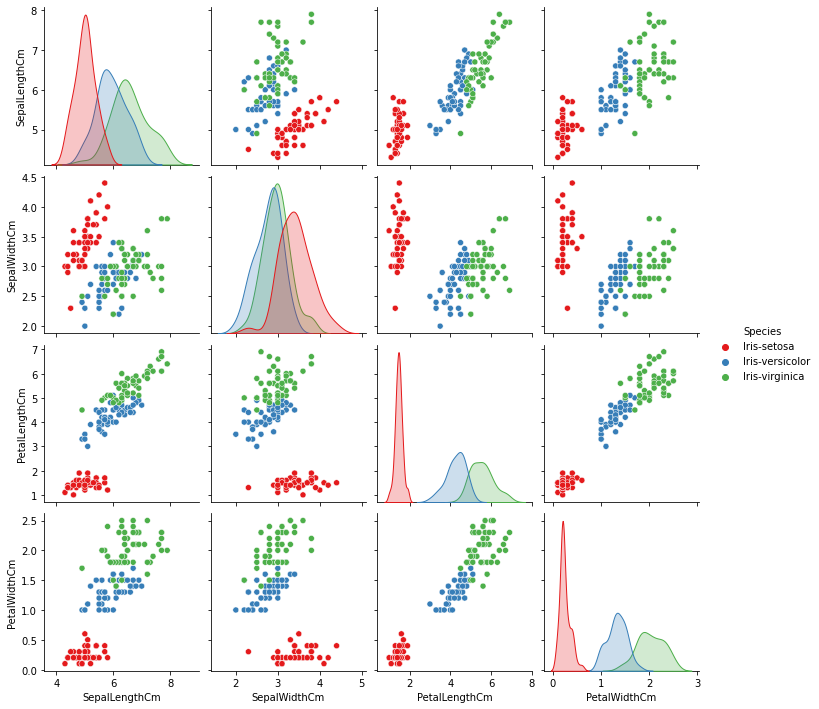

In [8]:
sns.pairplot(data=data,hue="Species",palette="Set1")
plt.show()

In [9]:
features = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

# K-Means Clustering

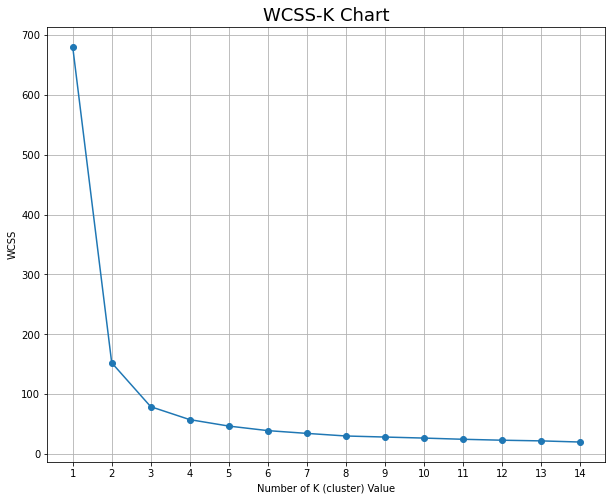

In [10]:
#K-MEANS
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    #kmeans.inertia_ =>find wcss for each key value and add to list
    wcss.append(kmeans.inertia_)

#as we can see,optimal point is k=3
plt.figure(figsize=(10,8))
plt.plot(range(1,15),wcss,"-o")#"-o"=> for marker(point)
plt.title("WCSS-K Chart", fontsize=18)
plt.grid(True)
plt.xlabel("Number of K (cluster) Value")
plt.ylabel("WCSS")
plt.xticks(range(1,15))
plt.show()

**According to Elbow Rule,we will choose 2 or 3.Because we don't know which one is better to use it.**

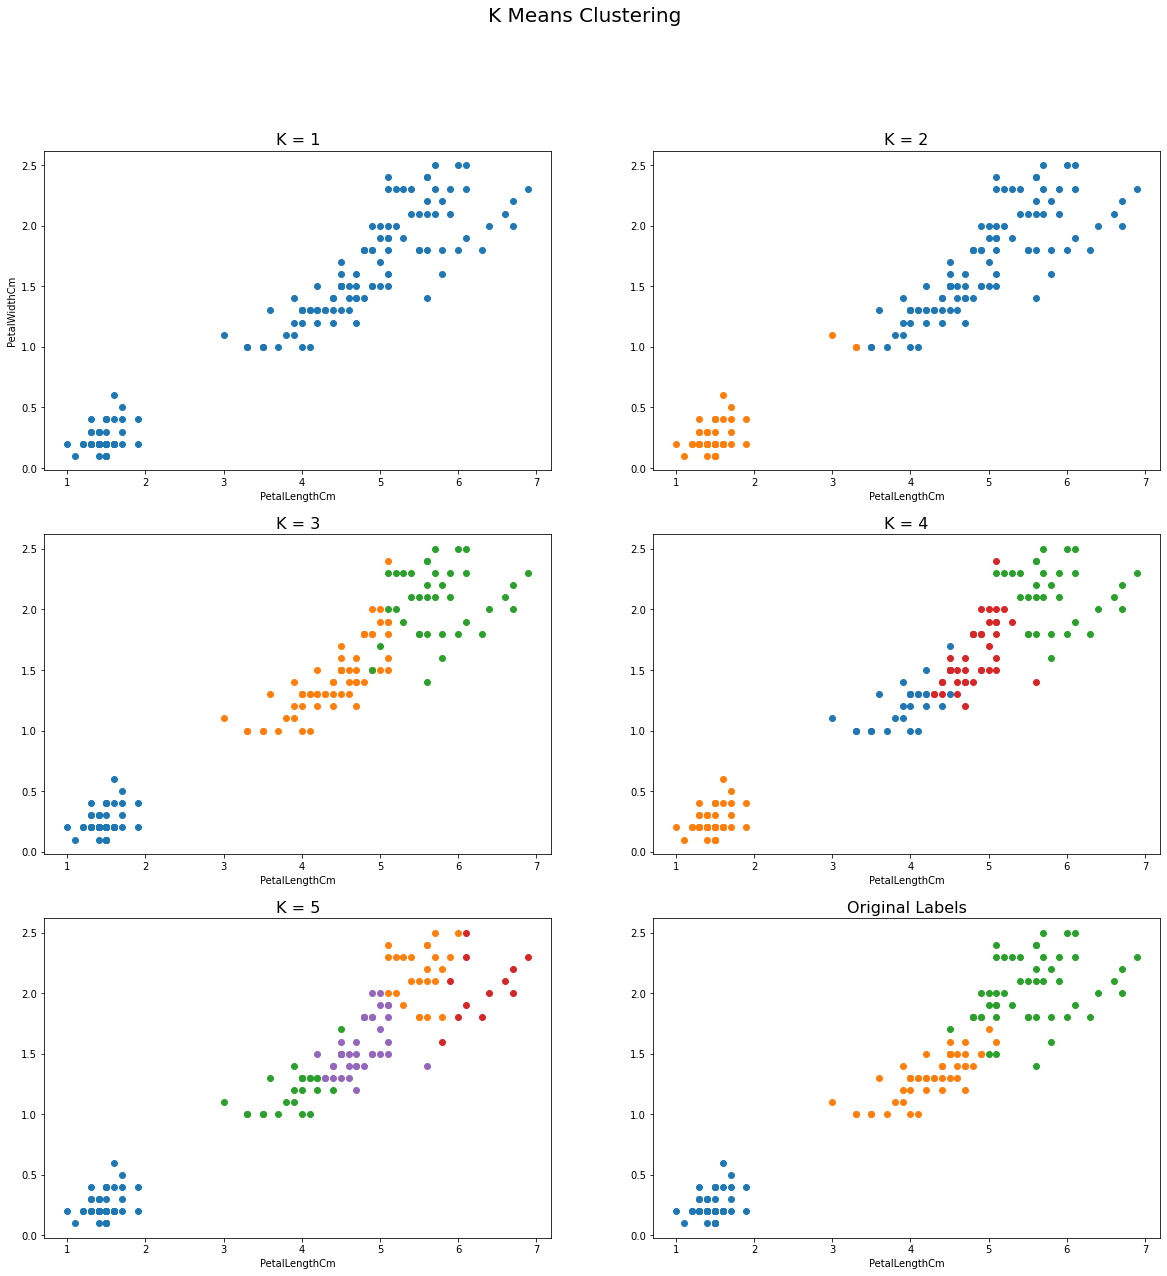

In [11]:
plt.figure(figsize=(20,20))
plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(3,2,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(3,2,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# drop labels to use for k=3
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# drop labels to use for k=4
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# drop labels to use for k=5
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,5)
plt.title("K = 5",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=5)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])
plt.scatter(features.PetalLengthCm[features.labels == 4],features.PetalWidthCm[features.labels == 4])

# drop labels
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,6)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(data.PetalLengthCm[data.Species == "Iris-setosa"],data.PetalWidthCm[data.Species == "Iris-setosa"])
plt.scatter(data.PetalLengthCm[data.Species == "Iris-versicolor"],data.PetalWidthCm[data.Species == "Iris-versicolor"])
plt.scatter(data.PetalLengthCm[data.Species == "Iris-virginica"],data.PetalWidthCm[data.Species == "Iris-virginica"])

plt.show()


**As we can see,we clearly seperate our classes using with K-Means Clustering Algorithm for k=3.**

# Hierarchical Clustering

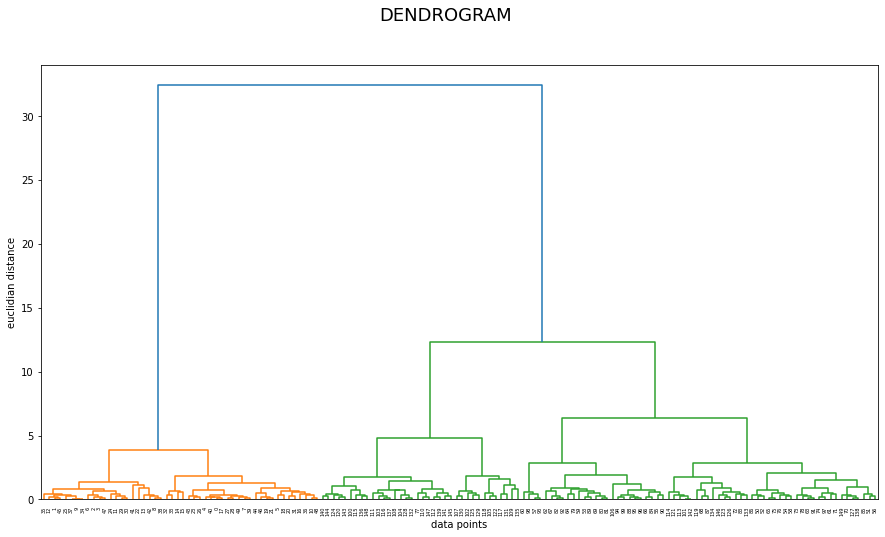

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

merge = linkage(features,method="ward")

plt.figure(figsize=(15,8))
dendrogram(merge, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")
plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()


In [13]:
# we draw a line on the longest vertical line between horizontal lines.
# Then we count how many vertical lines the line passes.
# As you can see,it's look like k=2 but we will see.

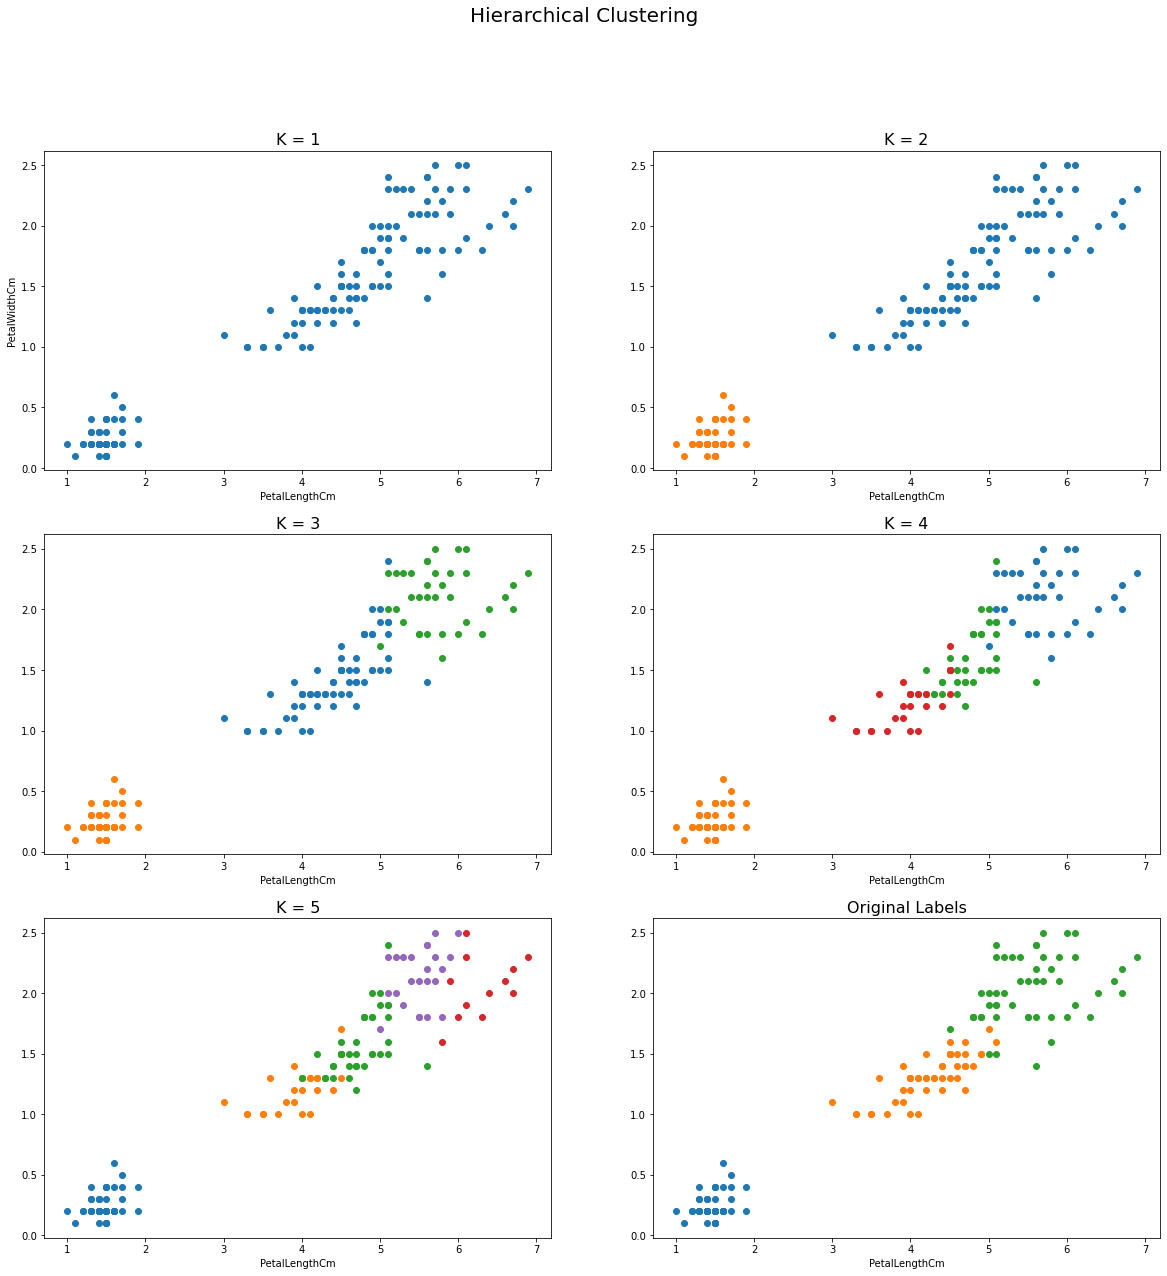

In [14]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20,20))
plt.suptitle("Hierarchical Clustering",fontsize=20)


plt.subplot(3,2,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(3,2,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# drop labels to use for k=3
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# drop labels to use for k=4
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# drop labels to use for k=5
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,5)
plt.title("K = 5",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=5)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])
plt.scatter(features.PetalLengthCm[features.labels == 4],features.PetalWidthCm[features.labels == 4])

# drop labels
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(3,2,6)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(data.PetalLengthCm[data.Species == "Iris-setosa"],data.PetalWidthCm[data.Species == "Iris-setosa"])
plt.scatter(data.PetalLengthCm[data.Species == "Iris-versicolor"],data.PetalWidthCm[data.Species == "Iris-versicolor"])
plt.scatter(data.PetalLengthCm[data.Species == "Iris-virginica"],data.PetalWidthCm[data.Species == "Iris-virginica"])

plt.show()

**As we can see,we clearly seperate our classes using with Hierarchical Clustering Algorithm for k=3.**







### Final Visualization with K Means with Clusters = 3




In [15]:
x = data.iloc[:, [0, 1, 2, 3]].values

# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)


In [16]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

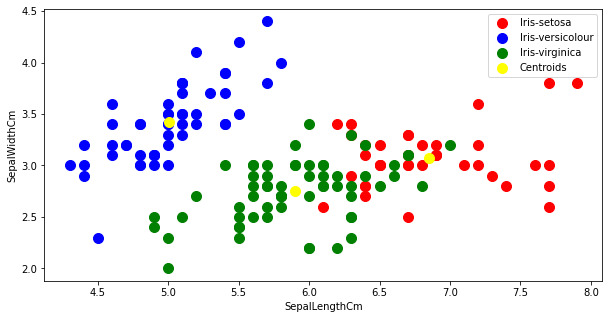

In [17]:
plt.figure(figsize=(10,5))

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

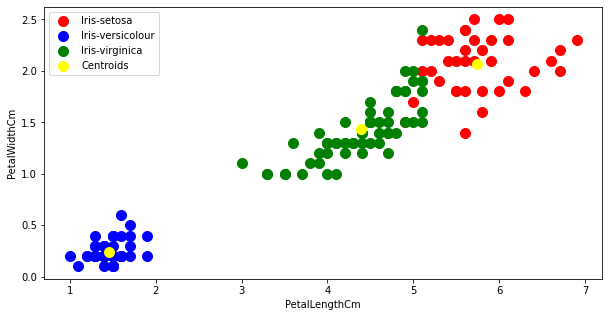

In [18]:
plt.figure(figsize=(10,5))

# Visualising the clusters - On the last two columns
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()